In [1]:
import numpy as np
# import cv2
import matplotlib.pyplot as plt
import matplotlib

import PIL
import torch
import torchvision
from torchvision import transforms

from ipyannotations import images

import os
import json

In [2]:
data_dir = '/Users/albertxu/Desktop/go-tests/scanner-data/'
image_files = os.listdir(data_dir)

In [55]:
def anno2json(anno, h, w):
    json_out = {}
    for box in anno:
        x,y,x2,y2 = box['xyxy']
        json_out[box['label']] = (x/h, y/w, x2/h, y2/w)
        
    return json.dumps(json_out)

def json2anno(file, h, w):
    with open(file, 'r') as f:
        json_in = json.load(f)
    
    boxes = [{
        'type': 'box',
        'label': lab,
        'xyxy': (a*h, b*w, c*h, d*w)
    } for lab, (a, b, c, d) in json_in.items()]
    return boxes

def on_sub(anno_f, h, w):
    def save_json(anno):
        outstr = anno2json(anno, h, w)
        with open(anno_f, 'w') as f:
            f.write(outstr)
    return save_json

In [80]:
widget = images.BoxAnnotator(
    canvas_size=(2000, 1000),
    options=['title',
             'slot',
             'mainstat',
             'level',
             'rarity',
             'substat',
             'set',
             'lock',
            'bbox']
)

def show(i):
    image_f = os.path.join(data_dir, f'image{i}.png')
    anno_f = os.path.join(data_dir, f'image{i}-anno.json')
    h, w = PIL.Image.open(image_f).size
    
    widget.display(image_f)
    if os.path.exists(anno_f):
        widget.data = json2anno(anno_f, h, w)

def on_submit(anno):
    global i

    image_f = os.path.join(data_dir, f'image{i}.png')
    anno_f = os.path.join(data_dir, f'image{i}-anno.json')
    h, w = PIL.Image.open(image_f).size
    on_sub(anno_f, h, w)(anno)
    
    i += 1
    show(i)
    
def on_undo():
    global i
    i -= 1
    show(i)

i = 54
show(i)
widget.on_submit(on_submit)
widget.on_undo(on_undo)
widget

BoxAnnotator(children=(Event(source=BoxAnnotator(children=(...), layout=Layout(width='2000px')), throttle_or_d…

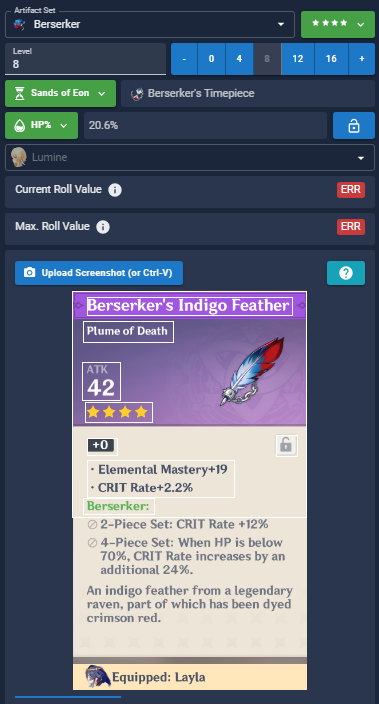

In [67]:
i = 3
im = PIL.Image.open(os.path.join(data_dir, f'image{i}.png'))
anno = json.load(open(os.path.join(data_dir, f'image{i}-anno.json'), 'r'))
# anno = {}
# for box in anno_raw:
#     anno[box['label']] = box['xyxy']


h, w = im.size
dr = PIL.ImageDraw.Draw(im)
for _, box in anno.items():
    mult = np.array([*im.size, *im.size])
    dr.rectangle(list(mult * box), outline='white')
im